# Task 5: Heart Disease Prediction using Decision Trees & Random Forests

**Objective:** Learn tree-based models for classification and evaluate their performance.

**Dataset:** Heart Disease Dataset   
**Tools:** Scikit-learn, Pandas, Matplotlib, Seaborn, Graphviz  

**Author:** Diya B                                                     
**Internship Task – AI/ML Internship**

##Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##Load Dataset

In [2]:
df = pd.read_csv("heart disease dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


##Dataset Overview

In [3]:
df.shape, df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


((1025, 14),
 None,
                age          sex           cp     trestbps        chol  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
 mean     54.434146     0.695610     0.942439   131.611707   246.00000   
 std       9.072290     0.460373     1.029641    17.516718    51.59251   
 min      29.000000     0.000000     0.000000    94.000000   126.00000   
 25%      48.000000     0.000000     0.000000   120.000000   211.00000   
 50%      56.000000     1.000000     1.000000   130.000000   240.00000   
 75%      61.000000     1.000000     2.000000   140.000000   275.00000   
 max      77.000000     1.000000     3.000000   200.000000   564.00000   
 
                fbs      restecg      thalach        exang      oldpeak  \
 count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
 mean      0.149268     0.529756   149.114146     0.336585     1.071512   
 std       0.356527     0.527878    23.005724     0.472772     1.175053   
 min       0

##Feature-Target Split

In [4]:
X = df.drop('target', axis=1)
y = df['target']

##Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#PART 1 – DECISION TREE CLASSIFIER
##Train Decision Tree (Base Model)

In [6]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

##Evaluate Decision Tree

In [7]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



##Visualize Decision Tree

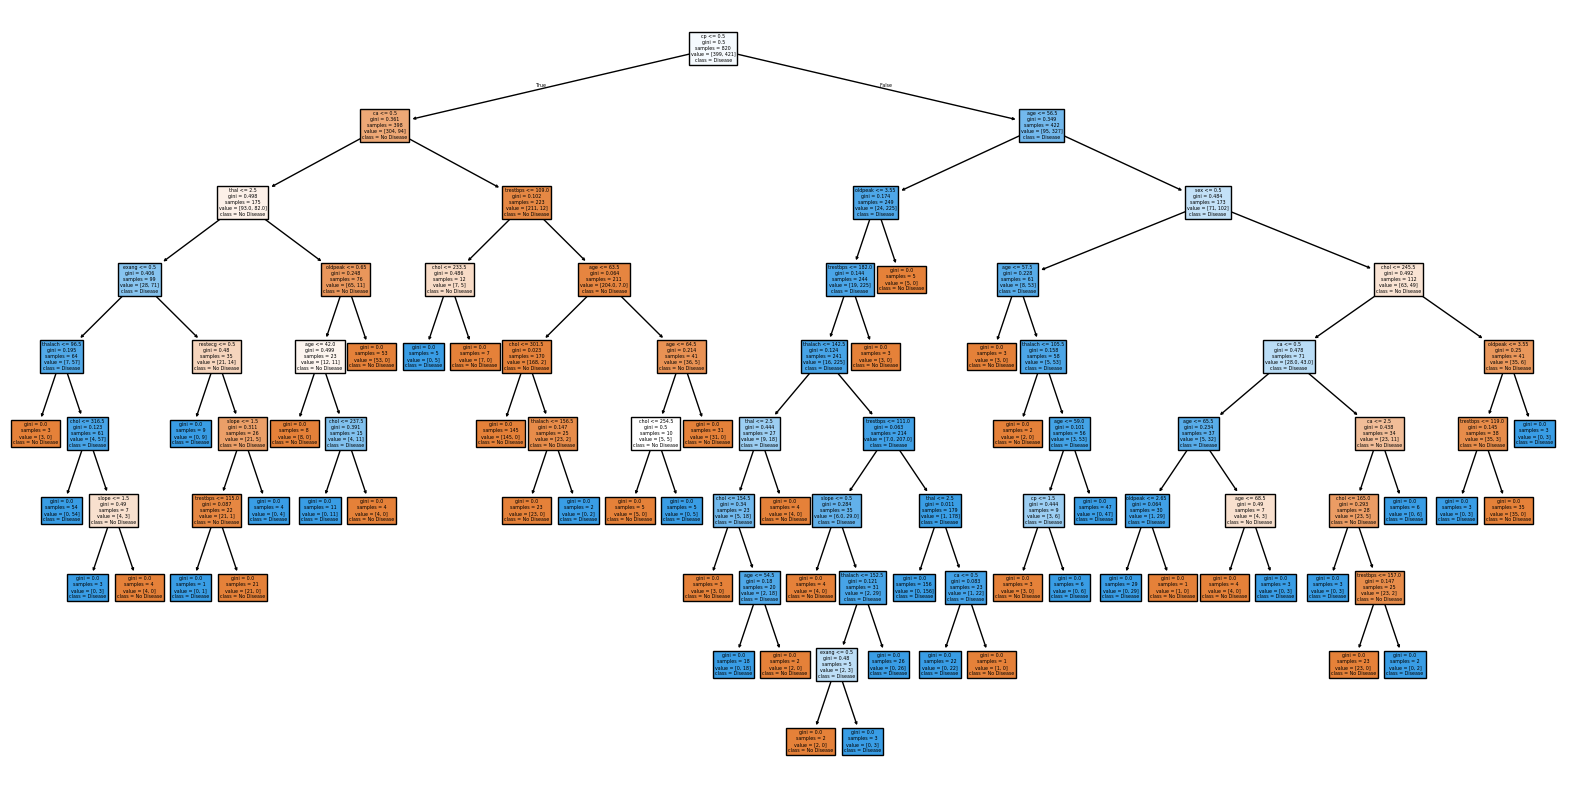

In [8]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

##Visualize Decision Tree using Graphviz


In [ ]:
from sklearn.tree import export_graphviz
import graphviz

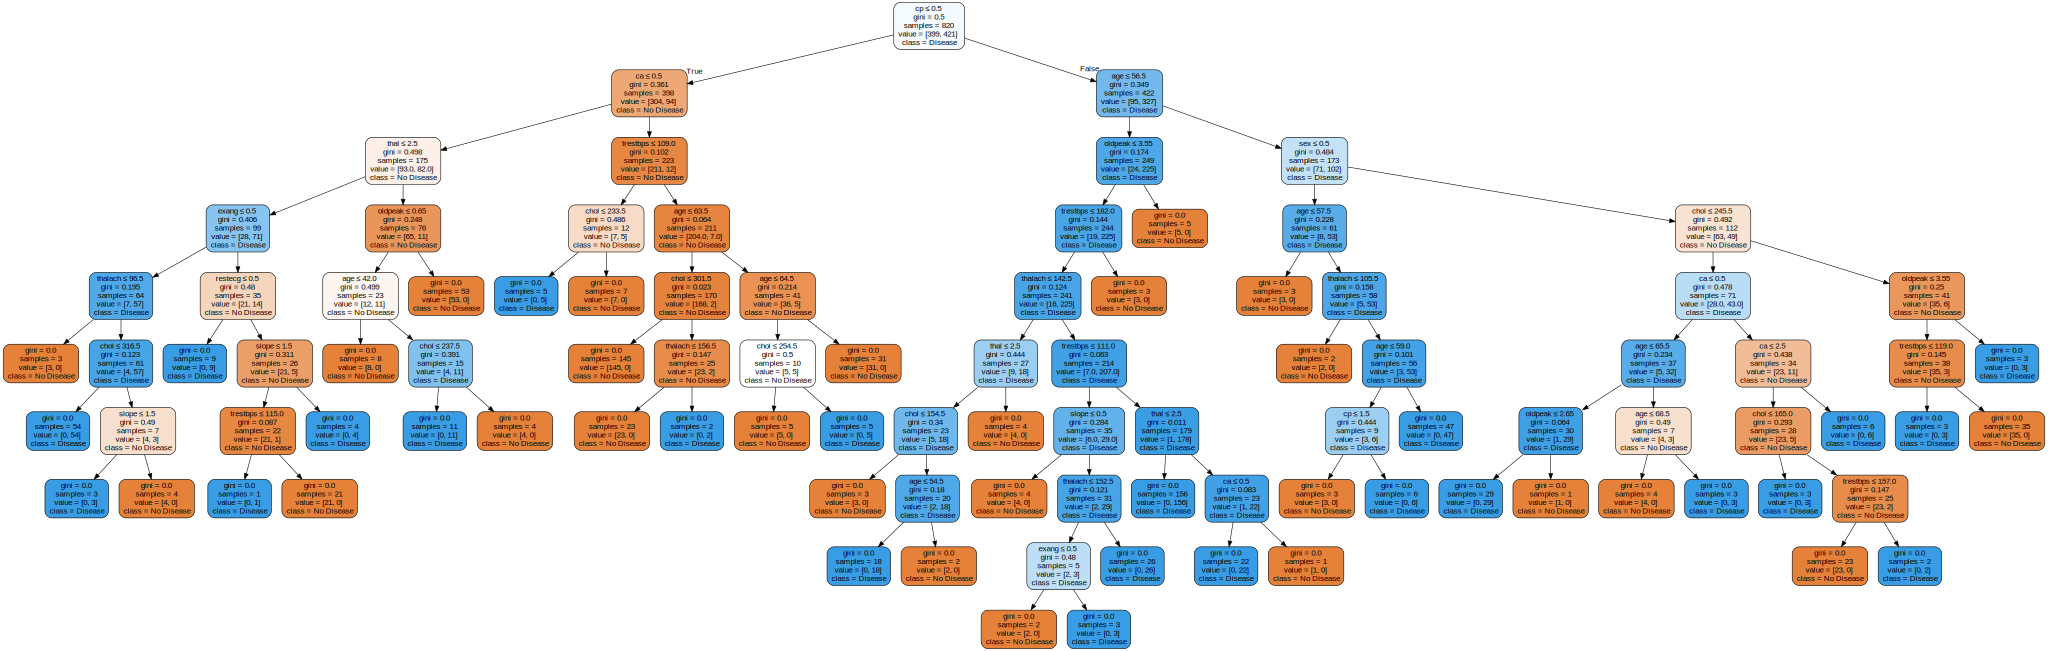

In [ ]:
dot_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

#PART 2 – OVERFITTING ANALYSIS & DEPTH CONTROL
##Control Tree Depth (Anti-Overfitting)

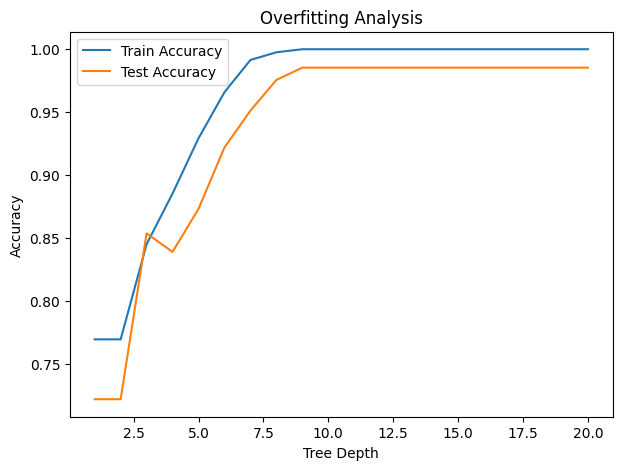

In [9]:
depths = range(1, 21)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)

    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(7,5))
plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Overfitting Analysis")
plt.legend()
plt.show()

#PART 3 – RANDOM FOREST CLASSIFIER
##Train Random Forest

In [10]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

##Evaluate Random Forest

In [11]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



#PART 4 – FEATURE IMPORTANCE ANALYSIS
##Feature Importance Plot

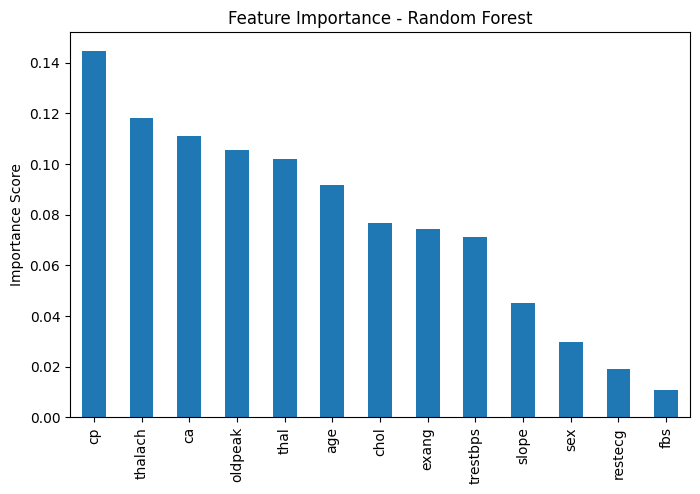

,0
cp,0.144796
thalach,0.118097
ca,0.110965
oldpeak,0.105590
thal,0.101825
age,0.091826
chol,0.076579
exang,0.074189
trestbps,0.071178
slope,0.045234


In [12]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8,5))
importances.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.ylabel("Importance Score")
plt.show()

importances

#PART 5 – CROSS VALIDATION
##Cross Validation Accuracy

In [13]:
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')

print("Cross Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Accuracy: 0.9970731707317073


##Cross Validation Accuracy Scores

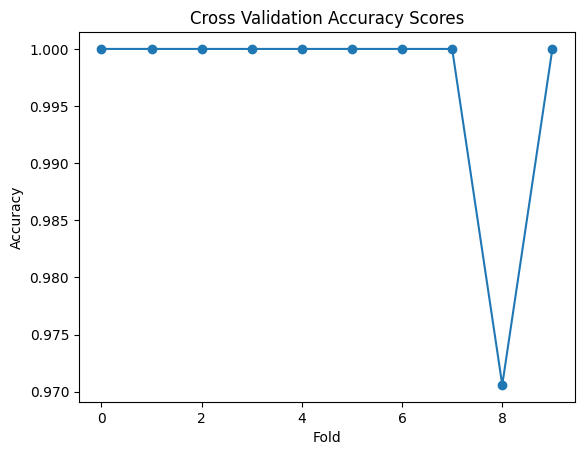

In [23]:
plt.figure()
plt.plot(cv_scores, marker='o')
plt.title("Cross Validation Accuracy Scores")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

## Conclusion

This project successfully implemented tree-based machine learning models to predict heart disease. The Decision Tree model provided high interpretability, while the Random Forest classifier achieved superior predictive performance through ensemble learning.

Overfitting analysis demonstrated the importance of controlling tree depth for better generalization. Feature importance evaluation revealed clinically relevant predictors contributing to heart disease diagnosis. Cross-validation confirmed the robustness and stability of the Random Forest model.

Overall, this project demonstrates a complete professional workflow for healthcare classification using advanced machine learning models, making it suitable for real-world diagnostic decision support systems.